<a href="https://colab.research.google.com/github/Muhammad-Nisar-7/Machine-Learning/blob/main/poisonousMushroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opendatasets --quiet
import opendatasets as od
import os
import pandas as pd

In [3]:
od.download('https://www.kaggle.com/competitions/playground-series-s4e8')

Skipping, found downloaded files in "./playground-series-s4e8" (use force=True to force download)


In [4]:
os.listdir('playground-series-s4e8')

['train.csv', 'test.csv', 'sample_submission.csv']

In [5]:
train_val_df = pd.read_csv('playground-series-s4e8/train.csv')
test_df = pd.read_csv('playground-series-s4e8/test.csv')

In [6]:
train_val_df.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [7]:
train_val_df.describe()

,id,cap-diameter,stem-height,stem-width
count,3.116945e+06,3.116941e+06,3.116945e+06,3.116945e+06
mean,1.558472e+06,6.309848e+00,6.348333e+00,1.115379e+01
std,8.997847e+05,4.657931e+00,2.699755e+00,8.095477e+00
min,0.000000e+00,3.000000e-02,0.000000e+00,0.000000e+00
25%,7.792360e+05,3.320000e+00,4.670000e+00,4.970000e+00
50%,1.558472e+06,5.750000e+00,5.880000e+00,9.650000e+00
75%,2.337708e+06,8.240000e+00,7.410000e+00,1.563000e+01
max,3.116944e+06,8.067000e+01,8.872000e+01,1.029000e+02


<Axes: xlabel='cap-diameter', ylabel='stem-width'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


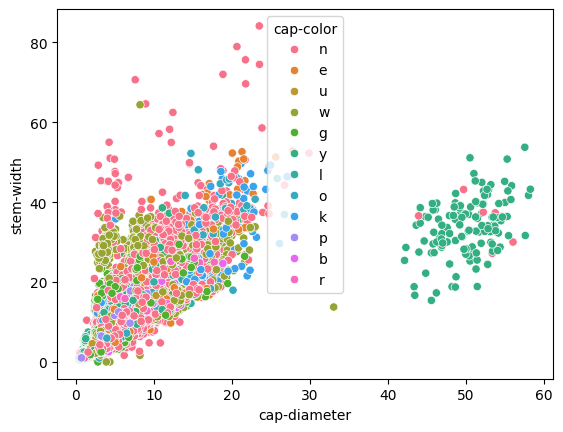

In [8]:
import seaborn as sns
temp_df = train_val_df.sample(30000)
sns.scatterplot(x = temp_df['cap-diameter'], y = temp_df['stem-width'], hue = temp_df['cap-color'])

<Axes: xlabel='cap-diameter', ylabel='stem-width'>

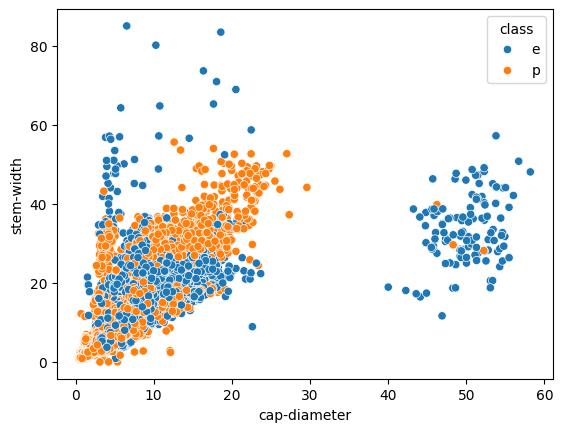

In [9]:
temp_df = train_val_df.sample(30000)
sns.scatterplot(x = temp_df['cap-diameter'], y = temp_df['stem-width'], hue = temp_df['class'])

In [10]:
train_val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [11]:
train_val_df.isnull().sum()

,0
id,0
class,0
cap-diameter,4
cap-shape,40
cap-surface,671023
cap-color,12
does-bruise-or-bleed,8
gill-attachment,523936
gill-spacing,1258435
gill-color,57


In [12]:
train_val_df.nunique()

,0
id,3116945
class,2
cap-diameter,3913
cap-shape,74
cap-surface,83
cap-color,78
does-bruise-or-bleed,26
gill-attachment,78
gill-spacing,48
gill-color,63


In [13]:
import numpy as np
corr_data = train_val_df.select_dtypes(include = np.number).corr()

<Axes: >

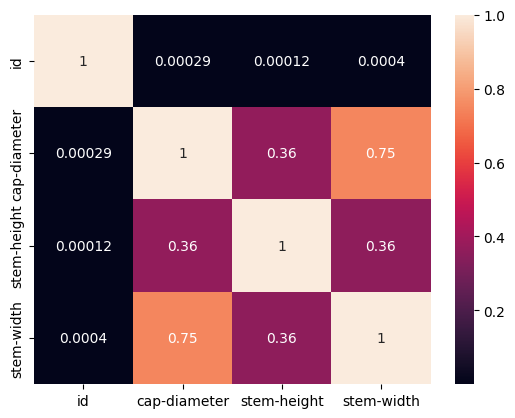

In [14]:
import seaborn as sns
sns.heatmap(corr_data, annot = True)

In [15]:
train_size = int(0.75 * len(train_val_df))
train_size

2337708

In [16]:
train_df = train_val_df[:train_size]
val_df = train_val_df[train_size:]

In [17]:
train_df.shape, val_df.shape

((2337708, 22), (779237, 22))

In [18]:
train_df['id'].nunique()

2337708

In [19]:
test_df.columns

Index(['id', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [20]:
input_cols = ['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color','does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color','veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season']
target_cols = ['class']

In [21]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_cols]
val_inputs = val_df[input_cols]
val_targets = val_df[target_cols]
test_inputs = test_df[input_cols]

In [22]:
train_inputs.describe()

,cap-diameter,stem-height,stem-width
count,2.337705e+06,2.337708e+06,2.337708e+06
mean,6.309444e+00,6.348042e+00,1.115128e+01
std,4.653124e+00,2.700962e+00,8.094597e+00
min,3.000000e-01,0.000000e+00,0.000000e+00
25%,3.320000e+00,4.670000e+00,4.970000e+00
50%,5.750000e+00,5.880000e+00,9.650000e+00
75%,8.240000e+00,7.410000e+00,1.563000e+01
max,8.067000e+01,8.872000e+01,1.029000e+02


In [23]:
train_inputs.isna().sum()

,0
cap-diameter,3
cap-shape,31
cap-surface,503021
cap-color,8
does-bruise-or-bleed,6
gill-attachment,392932
gill-spacing,943749
gill-color,39
stem-height,0
stem-width,0


In [24]:
train_inputs.dtypes

,0
cap-diameter,float64
cap-shape,object
cap-surface,object
cap-color,object
does-bruise-or-bleed,object
gill-attachment,object
gill-spacing,object
gill-color,object
stem-height,float64
stem-width,float64


In [25]:
numeric_cols = list(train_inputs.select_dtypes(include = np.number).columns)
numeric_cols

['cap-diameter', 'stem-height', 'stem-width']

In [26]:
categorical_cols = list(train_inputs.select_dtypes(exclude = np.number).columns)
categorical_cols

['cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-root',
 'stem-surface',
 'stem-color',
 'veil-type',
 'veil-color',
 'has-ring',
 'ring-type',
 'spore-print-color',
 'habitat',
 'season']

In [27]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
train_inputs[numeric_cols].describe()

,cap-diameter,stem-height,stem-width
count,2337705.00,2337708.00,2337708.00
mean,6.31,6.35,11.15
std,4.65,2.70,8.09
min,0.30,0.00,0.00
25%,3.32,4.67,4.97
50%,5.75,5.88,9.65
75%,8.24,7.41,15.63
max,80.67,88.72,102.90


In [28]:
from sklearn.impute import SimpleImputer

In [29]:
imputer = SimpleImputer(strategy = 'mean').fit(train_inputs[numeric_cols])

In [30]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

<ipython-input-30-e9f917d767f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
<ipython-input-30-e9f917d767f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
<ipython-input-30-e9f917d767f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [31]:
train_inputs[numeric_cols].isna().sum()

,0
cap-diameter,0
stem-height,0
stem-width,0


In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

In [34]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

<ipython-input-34-a758576da409>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
<ipython-input-34-a758576da409>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
<ipython-input-34-a758576da409>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [35]:
train_inputs[numeric_cols].head()

,cap-diameter,stem-height,stem-width
0,0.11,0.05,0.15
1,0.05,0.05,0.06
2,0.08,0.08,0.10
3,0.04,0.05,0.06
4,0.07,0.04,0.08


In [36]:
train_inputs[categorical_cols].isna().sum()

,0
cap-shape,31
cap-surface,503021
cap-color,8
does-bruise-or-bleed,6
gill-attachment,392932
gill-spacing,943749
gill-color,39
stem-root,2068144
stem-surface,1485797
stem-color,30


In [37]:
train_inputs.shape

(2337708, 20)

In [38]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
encoder = OneHotEncoder(handle_unknown = 'ignore', sparse=False).fit(train_inputs[categorical_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [40]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [41]:
len(encoded_cols)

721

In [42]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

<ipython-input-42-8950d7c1751d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
<ipython-input-42-8950d7c1751d>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
<ipython-input-42-8950d7c1751d>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all 

In [43]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
model = RandomForestClassifier(random_state = 42, n_jobs = -1).fit(X_train, train_targets)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [46]:
from sklearn.metrics import accuracy_score

In [47]:
train_preds = model.predict(X_train)

In [48]:
accuracy_score(train_preds, train_targets)

0.9999893057644497

In [49]:
model.score(X_val, val_targets), model.score(X_train, train_targets)

(0.9923142766578076, 0.9999893057644497)

In [51]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(model, X_train, train_targets, cv=5)  # Assuming X, y are your features and target
print(f"Cross-Validation Scores: {scores}")
print(f"Mean CV Score: {np.mean(scores)}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Cross-Validation Scores: [0.99224027 0.99215258 0.99216541 0.99208198 0.99200498]
Mean CV Score: 0.9921290425617194


In [53]:
sample_df = pd.read_csv('playground-series-s4e8/sample_submission.csv')

In [54]:
sample_df.shape

(2077964, 2)

In [55]:
test_preds = model.predict(X_test)

In [56]:
test_preds

array(['e', 'p', 'p', ..., 'p', 'e', 'e'], dtype=object)

In [57]:
sample_df.head()

,id,class
0,3116945,e
1,3116946,e
2,3116947,e
3,3116948,e
4,3116949,e


In [58]:
sample_df.drop(columns = ['class'], axis = 1, inplace = True)

In [59]:
sample_df.head()

,id
0,3116945
1,3116946
2,3116947
3,3116948
4,3116949


In [60]:
sample_df['class'] = test_preds

In [61]:
sample_df.head()

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e


In [62]:
sample_df.to_csv('submission.csv', index = None)

In [63]:
model.feature_importances_
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance':model.feature_importances_
}).sort_values('importance', ascending = False)

In [64]:
importance_df['feature'].tolist()[:10]

['stem-width',
 'cap-diameter',
 'stem-height',
 'stem-color_w',
 'gill-spacing_c',
 'stem-surface_nan',
 'gill-spacing_d',
 'gill-color_w',
 'gill-spacing_nan',
 'gill-attachment_p']

In [65]:
import joblib
first_model_nt = {
    'model':model,
    'imputer':imputer,
    'scaler':scaler,
    'encoder':encoder,
    'input_cols':input_cols,
    'target_cols':target_cols,
    'numeric_cols':numeric_cols,
    'categorical_cols':categorical_cols,
    'encoded_cols':encoded_cols
}

In [66]:
joblib.dump(first_model_nt,'first_model_nt.joblib')

['first_model_nt.joblib']